In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = load_iris()
iris_data = pd.DataFrame(data.data, columns = ["sepal-length", "sepal-width", "petal-length", "petal-width"])
iris_data["class"] = data.target

In [3]:
print(iris_data.head(20))

    sepal-length  sepal-width  petal-length  petal-width  class
0            5.1          3.5           1.4          0.2      0
1            4.9          3.0           1.4          0.2      0
2            4.7          3.2           1.3          0.2      0
3            4.6          3.1           1.5          0.2      0
4            5.0          3.6           1.4          0.2      0
5            5.4          3.9           1.7          0.4      0
6            4.6          3.4           1.4          0.3      0
7            5.0          3.4           1.5          0.2      0
8            4.4          2.9           1.4          0.2      0
9            4.9          3.1           1.5          0.1      0
10           5.4          3.7           1.5          0.2      0
11           4.8          3.4           1.6          0.2      0
12           4.8          3.0           1.4          0.1      0
13           4.3          3.0           1.1          0.1      0
14           5.8          4.0           

In [4]:
print(iris_data.describe())

       sepal-length  sepal-width  petal-length  petal-width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [5]:
print(iris_data.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


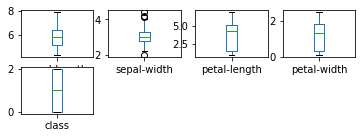

In [6]:
iris_data.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False)
plt.show()

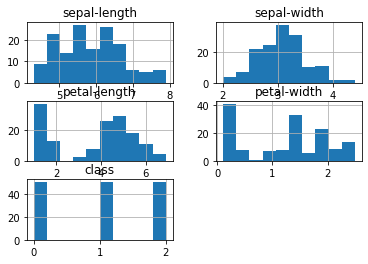

In [7]:
iris_data.hist()
plt.show()

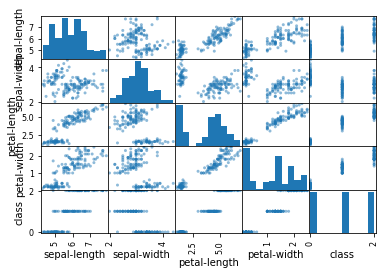

In [8]:
scatter_matrix(iris_data)
plt.show()

In [9]:
array = iris_data.values

X = array[:, 0:4]
Y = array[:, 4]
seed = 6
validation_size = 0.20
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [14]:
seed = 6
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

results = []
names = []
for name, model in models:
    Kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, scoring=scoring, cv = Kfold)
    results.append(cv_results)
    names.append(name)
    msg  = "%s	:	%f	(%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

LR	:	0.958333	(0.041667)
LDA	:	0.975000	(0.038188)
KNN	:	0.958333	(0.041667)
CART	:	0.933333	(0.050000)
NB	:	0.966667	(0.040825)
SVC	:	0.941667	(0.053359)
